In [3]:
#Name: Nayantara Biswas
#Assignment: Lab 4 (Analyzing Flights)
#Inputs: Airport and Routes databses 
#Output: Frequency of flights by distance using latitudes and longitudes of source and destination airports
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports.dat


In [38]:
#Challenge 1: Print all of the airport names for India
import csv
f = open("airports.dat")
for row in csv.reader(f):
  if row[3] == "India":
    print(row[1])

Sardar Vallabhbhai Patel International Airport
Akola Airport
Aurangabad Airport
Chhatrapati Shivaji International Airport
Bilaspur Airport
Bhuj Airport
Belgaum Airport
Vadodara Airport
Raja Bhoj International Airport
Bhavnagar Airport
Daman Airport
Deesa Airport
Guna Airport
Dabolim Airport
Devi Ahilyabai Holkar Airport
Jabalpur Airport
Jamnagar Airport
Kandla Airport
Khajuraho Airport
Kolhapur Airport
Keshod Airport
Dr. Babasaheb Ambedkar International Airport
Nashik Airport
Pune Airport
Porbandar Airport
Rajkot Airport
Raipur Airport
Solapur Airport
Surat Airport
Maharana Pratap Airport
Along Airport
Agartala Airport
Lengpui Airport
Bagdogra Airport
Bokaro Airport
Biju Patnaik Airport
Netaji Subhash Chandra Bose International Airport
Cooch Behar Airport
Dhanbad Airport
Gaya Airport
Hirakud Airport
Imphal Airport
Jharsuguda Airport
Sonari Airport
Jorhat Airport
Kailashahar Airport
Silchar Airport
North Lakhimpur Airport
Dibrugarh Airport
Muzaffarpur Airport
Nawapara Airport
Panagarh A

In [ ]:
#Challenge 2: Read Airport Database  (using latitudes and longitudes)
latitudes = {} #Define a dictionary for latitude
longitudes = {} #Define a dictionary for longitude
f = open("airports.dat") #Import Database
for row in csv.reader(f):
  airport_id = row[0]
  latitudes[airport_id] = float(row[6])
  longitudes[airport_id] = float(row[7])
latitudes
longitudes

In [14]:
#Challenge 3: Route distances from source and destination (using latitudes and longitudes)
#Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance


In [16]:
# Code to import and check the geo_distance.py file to make sure it works.
distance(-37.814,144.963,52.519,13.406) # Melbourne to Berlin in km!

15973.237754707652

In [17]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()


Saving routes.dat to routes.dat


In [ ]:
#import the routes.dat file 
import csv
distances=[] #Define list to hold the distance
f = open("routes.dat") #Import Database
for row in csv.reader(f): 
  source_airport= row[3] #Define source and destination for distance calculations
  destination_airport=row[5] #Define source and destination for distance calculations
  if source_airport in latitudes and destination_airport in latitudes: #Some airports in the airports.dat file are not in the routes file and we want only the airports that are in the routes file
    #define the source latitudes longitudes from the previously defined dictionary 
    source_latitudes=latitudes[source_airport] #Define the source latitudes from the previously defined dictionary 
    source_longitude=longitudes[source_airport] #Define the source longitudes from the previously defined dictionary 
    destination_latitudes=latitudes[destination_airport] #Define destination latitudes from the previously defined dictionary 
    destination_longitudes=longitudes[destination_airport] #Define destination longitude from the previously defined dictionary 
    distances.append(distance(source_latitudes,source_longitude,destination_latitudes,destination_longitudes)) #Appened the source and destination airports to the distances list 
distances

Text(0, 0.5, 'number of flights')

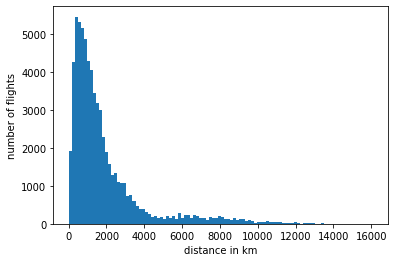

In [35]:
#Challenge 4: Histogram displaying the frequency of flights by distance
import numpy as np
import matplotlib.pyplot as plt
plt.hist(distances,100)
plt.xlabel("distance in km")
plt.ylabel("number of flights")